# **We are initializing the necessary libraries to run this cnn model**

In [117]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import plot_model


In [1]:
me = {'name': 'Iftekharul Haque Noor', 'reg': 2018831058}
print("Name:", me['name'])
print("Reg:", me['reg'])

Name: Iftekharul Haque Noor
Reg: 2018831058


# Loading data from the input file

In [118]:
train = '../input/archive/train'
val = '../input/archive/val'
test = '../input/archive/test'

# We set up data generators with data augmentation for training


In [119]:
train_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)

# We set the batch size and image dimensions

In [120]:
batch_size = 32
img_height, img_width = 150, 150

# The batches of augmented data are generated

In [121]:

train_generator = train_data_generator.flow_from_directory(
    train,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


# The model is defined

In [122]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(128, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid'))


In [123]:
cnn.summary()
     

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 17, 17, 128)      

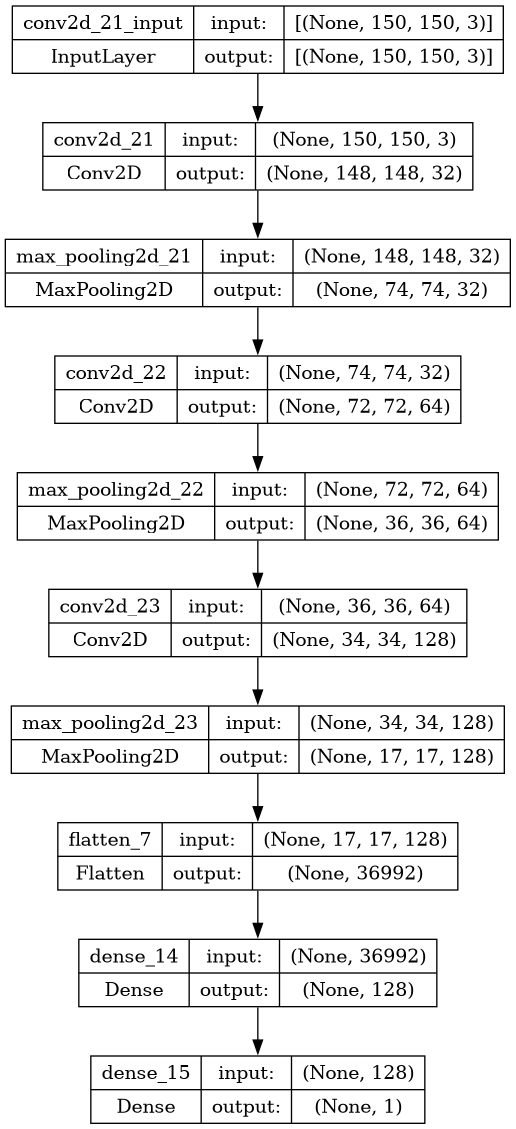

In [124]:

plot_model(cnn,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

# We compile the model using suitable parameters

In [125]:

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Checking the sample and batch size for training purposes

In [126]:
print("Samples in the training set:", train_generator.samples)
print("Samples in the training set:", val_generator.samples)
print("Batch size:", batch_size)

Samples in the training set: 5216
Samples in the training set: 16
Batch size: 32


# Model training phase

In [127]:

history = cnn.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    epochs=10
)


Epoch 1/10
163/163 [==============================] - 169s 1s/step - loss: 0.3322 - accuracy: 0.8564 - val_loss: 0.7051 - val_accuracy: 0.6875
Epoch 2/10
163/163 [==============================] - 168s 1s/step - loss: 0.2193 - accuracy: 0.9107 - val_loss: 0.8636 - val_accuracy: 0.6250
Epoch 3/10
163/163 [==============================] - 167s 1s/step - loss: 0.1844 - accuracy: 0.9275 - val_loss: 0.5268 - val_accuracy: 0.7500
Epoch 4/10
163/163 [==============================] - 166s 1s/step - loss: 0.1813 - accuracy: 0.9270 - val_loss: 0.5252 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 169s 1s/step - loss: 0.1501 - accuracy: 0.9450 - val_loss: 1.1257 - val_accuracy: 0.6250
Epoch 6/10
163/163 [==============================] - 167s 1s/step - loss: 0.1434 - accuracy: 0.9433 - val_loss: 0.4607 - val_accuracy: 0.8125
Epoch 7/10
163/163 [==============================] - 171s 1s/step - loss: 0.1306 - accuracy: 0.9517 - val_loss: 0.6626 - val_accuracy: 0.7500

# Generating test data

In [128]:

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)


Found 624 images belonging to 2 classes.


# Evaluation with test data

In [129]:
test_loss, test_acc = cnn.evaluate(test_generator, steps=len(test_generator))

20/20 [==============================] - 9s 463ms/step - loss: 0.4219 - accuracy: 0.8766


# Print accuracy of the model on the test data

In [130]:
print("test data accuracy: {:.2f}%".format(test_acc * 100))

test data accuracy: 87.66%


# Prediction on test data


In [131]:
predictions = cnn.predict(test_generator, steps=len(test_generator))
predicted_classes = (predictions > 0.5).astype(int)

20/20 [==============================] - 9s 438ms/step


# printing classification report and confusion matrix

In [132]:
print("Classification Report:\n", classification_report(test_generator.classes, predicted_classes))
print("Confusion Matrix:\n", confusion_matrix(test_generator.classes, predicted_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.30      0.35       234
           1       0.64      0.74      0.69       390

    accuracy                           0.58       624
   macro avg       0.52      0.52      0.52       624
weighted avg       0.55      0.58      0.56       624

Confusion Matrix:
 [[ 70 164]
 [101 289]]


# Plotting the inferenced data

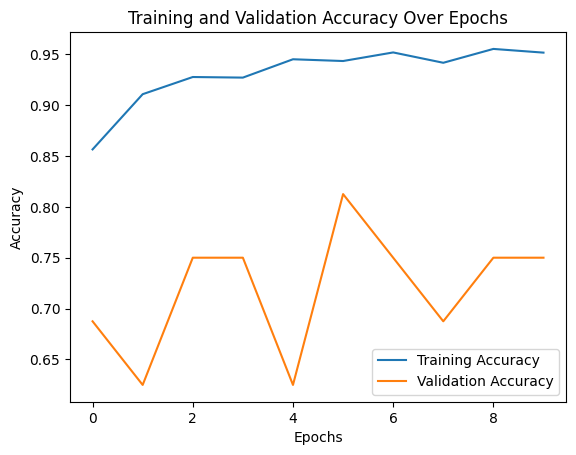

In [133]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()
